In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_results = pd.read_csv("C:\\Users\\admin\\Documents\\scFiLM\\results\\full_norm_stats.csv", index_col=0)

In [5]:
df_results = df_results

,key,r2_A549,r2_K562,r2_MCF7,rank_logfc_A549,rank_logfc_K562,rank_logfc_MCF7,edistance_A549,edistance_K562,edistance_MCF7,logfc_corr_A549,logfc_corr_K562,logfc_corr_MCF7,top_logfc_corr_A549,top_logfc_corr_K562,top_logfc_corr_MCF7
0,null_rawcount,0.864244,0.841639,0.876907,0.509760,0.498413,0.486486,119.250170,39.357768,457.147316,0.295812,0.254656,0.240503,0.195331,0.117801,0.213440
1,mean_rawcount,0.890718,0.874651,0.895133,0.500000,0.500000,0.500000,102.117501,32.066392,376.653509,0.471487,0.497378,0.507627,0.574262,0.464673,0.500899
2,decoder_rawcount,0.902646,0.868443,0.926623,0.409159,0.499206,0.479730,85.965161,34.158945,260.492063,0.448192,0.457125,0.442449,0.548218,0.396243,0.478356
3,mlp_rawcount,0.896791,0.879521,0.922497,0.415916,0.442063,0.435435,95.981361,31.649390,296.607451,0.431892,0.433839,0.439343,0.541698,0.372165,0.490143
4,prnet_rawcount,0.881217,0.859988,0.822355,0.500000,0.500000,0.500000,108.968275,40.499080,689.105969,NaN,NaN,NaN,NaN,NaN,NaN
5,null_cpm,0.888060,0.861526,0.919860,0.508258,0.497619,0.481231,328.361973,250.550363,227.285946,0.297959,0.255825,0.242604,0.203167,0.147025,0.181642
6,mean_cpm,0.918139,0.900936,0.935028,0.500000,0.500000,0.500000,239.324189,172.020477,183.459173,0.465454,0.491139,0.505213,0.573701,0.455599,0.495971
7,decoder_cpm,0.930451,0.898675,0.942917,0.439189,0.448413,0.412162,206.649856,194.734667,164.422248,0.471654,0.481748,0.473624,0.500233,0.485421,0.487464
8,mlp_cpm,0.942737,0.926386,0.958154,0.414414,0.453175,0.421922,171.017591,136.460923,120.788543,0.566667,0.554882,0.542383,0.615848,0.384954,0.471242
9,prnet_cpm,0.781523,0.756205,0.765979,0.500000,0.500000,0.500000,656.870583,486.738861,692.671268,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_r2 = df_results[['key', 'r2_A549', 'r2_K562', 'r2_MCF7']]
df_r2['norm_method'] = [x.split("_")[1] for x in df_r2['key']]
df_r2['model_name'] = [x.split("_")[0] for x in df_r2['key']]

C:\Users\admin\AppData\Local\Temp\ipykernel_10552\2807799515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r2['norm_method'] = [x.split("_")[1] for x in df_r2['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_10552\2807799515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r2['model_name'] = [x.split("_")[0] for x in df_r2['key']]


In [33]:
df_melted = df_r2.melt(
    id_vars=["norm_method", "model_name"],
    value_vars=["r2_A549", "r2_K562", "r2_MCF7"],
    var_name="cell_type",
    value_name="r2_score"
)

df_melted["cell_type"] = df_melted["cell_type"].str.replace("r2_", "")

In [34]:
df_melted

,norm_method,model_name,cell_type,r2_score
0,rawcount,null,A549,0.864244
1,rawcount,mean,A549,0.890718
2,rawcount,decoder,A549,0.902646
3,rawcount,mlp,A549,0.896791
4,rawcount,prnet,A549,0.881217
5,cpm,null,A549,0.888060
6,cpm,mean,A549,0.918139
7,cpm,decoder,A549,0.930451
8,cpm,mlp,A549,0.942737
9,cpm,prnet,A549,0.781523


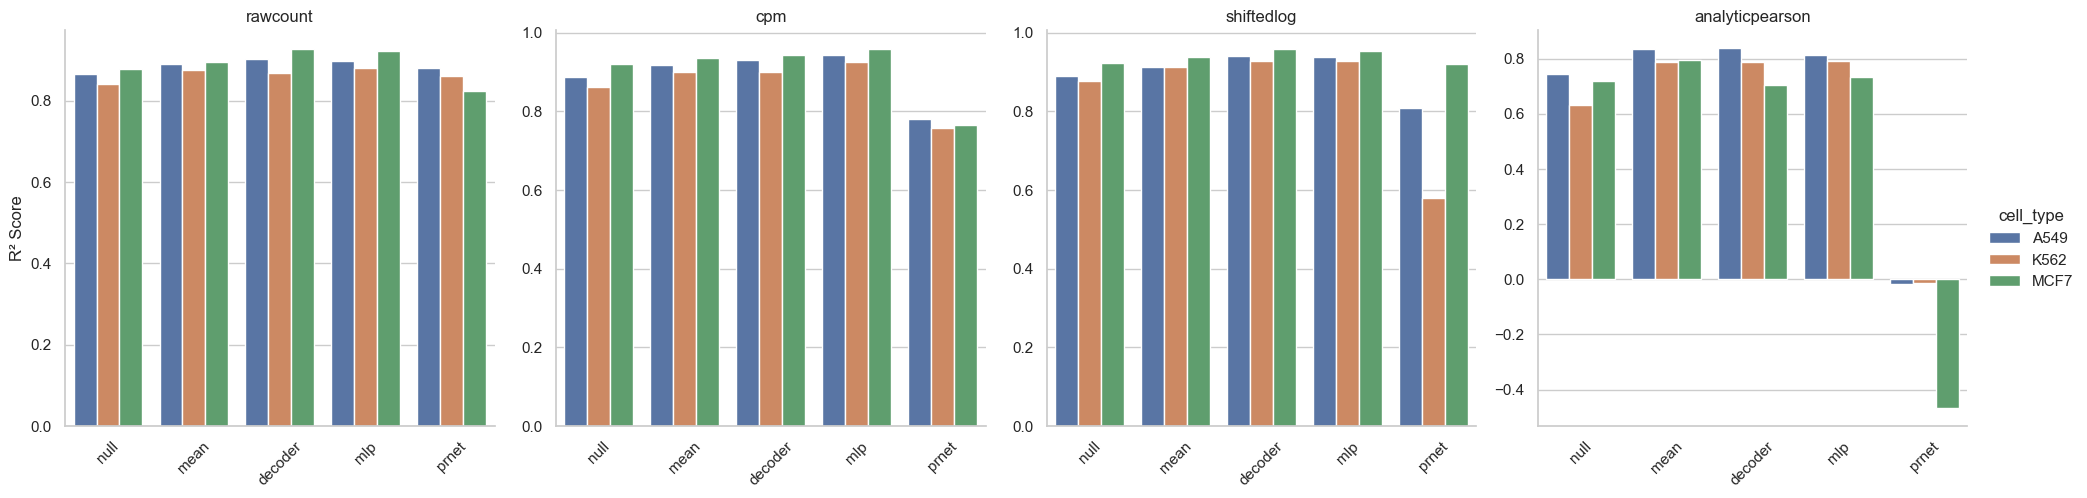

In [35]:
g = sns.catplot(
    data=df_melted,
    x="model_name",
    y="r2_score",
    hue="cell_type",
    col="norm_method",
    kind="bar",
    height=5,
    aspect=1,
    sharey=False
)
g.set_titles("{col_name}")
g.set_axis_labels("", "R² Score")
g.set_xticklabels(rotation=45)
plt.show()

In [27]:
df_edist = df_results[['key', 'edistance_A549', 'edistance_K562', 'edistance_MCF7']]
df_edist['norm_method'] = [x.split("_")[1] for x in df_edist['key']]
df_edist['model_name'] = [x.split("_")[0] for x in df_edist['key']]

C:\Users\admin\AppData\Local\Temp\ipykernel_10552\843225047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edist['norm_method'] = [x.split("_")[1] for x in df_edist['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_10552\843225047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edist['model_name'] = [x.split("_")[0] for x in df_edist['key']]


In [28]:
df_melted = df_edist.melt(
    id_vars=["norm_method", "model_name"],
    value_vars=["edistance_A549", "edistance_K562", "edistance_MCF7"],
    var_name="cell_type",
    value_name="edistance"
)

df_melted["cell_type"] = df_melted["cell_type"].str.replace("edistance_", "")

In [29]:
df_melted

,norm_method,model_name,cell_type,edistance
0,rawcount,null,A549,119.250170
1,rawcount,mean,A549,102.117501
2,rawcount,decoder,A549,85.965161
3,rawcount,mlp,A549,95.981361
4,rawcount,prnet,A549,108.968275
5,cpm,null,A549,328.361973
6,cpm,mean,A549,239.324189
7,cpm,decoder,A549,206.649856
8,cpm,mlp,A549,171.017591
9,cpm,prnet,A549,656.870583


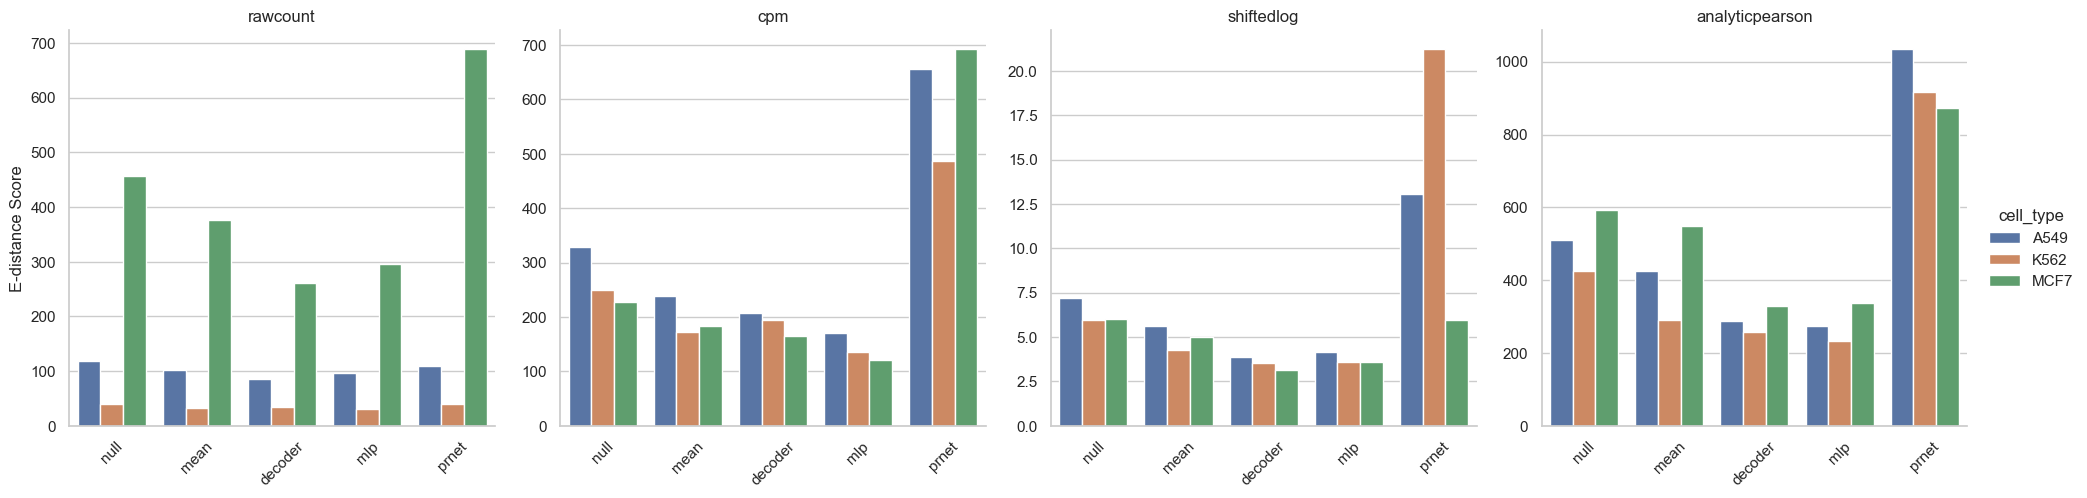

In [32]:
g = sns.catplot(
    data=df_melted,
    x="model_name",
    y="edistance",
    hue="cell_type",
    col="norm_method",
    kind="bar",
    height=5,
    aspect=1,
    sharey=False,
)
g.set_titles("{col_name}")
g.set_axis_labels("", "E-distance Score")
g.set_xticklabels(rotation=45)
plt.show()

In [ ]:
df_edist = df_results[['key', 'edistance_A549', 'edistance_K562', 'edistance_MCF7']]
df_edist['norm_method'] = [x.split("_")[1] for x in df_edist['key']]
df_edist['model_name'] = [x.split("_")[0] for x in df_edist['key']]